In [1]:
# !pip3 install missingpy

In [30]:
#!pip3 install scikit-learn==0.20.1  # dep for missingpy
#!pip3 install scikit-learn==0.24.1  # required for getting tree diagram

  Using cached scikit_learn-0.24.1-cp37-cp37m-macosx_10_13_x86_64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [14]:
data_path = '../data/'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
random_state = 2021

## Year $N$

In [15]:
N = '5'
drop_cols = ['Attr37']

In [16]:
arff = loadarff(data_path+N+'year.arff')
df = pd.DataFrame(arff[0])
df['class']= df['class'].astype('int')
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0


In [17]:
df.isnull().sum().sort_values(ascending=False).head()

Attr37    2548
Attr27     391
Attr60     268
Attr45     268
Attr24     135
dtype: int64

In [18]:
df = df.drop(drop_cols,axis='columns')
df.shape

(5910, 64)

In [19]:
df = df.drop_duplicates()
df.shape

(5850, 64)

### Split train-dev-test without NaN in dev/test

In [37]:
na_free = df.dropna()
only_na = df[~df.index.isin(na_free.index)]

assert na_free.shape[0]+only_na.shape[0] == df.shape[0]

na_free.shape, only_na.shape

((6243, 63), (702, 63))

In [39]:
X = na_free.drop('class',axis='columns')
Y = na_free['class']
(X.shape,Y.shape)

((6243, 62), (6243,))

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.4, random_state=random_state,shuffle=True,stratify=Y)

In [41]:
X_train.shape,Y_train.shape

((3745, 62), (3745,))

In [42]:
X_train = pd.concat([X_train,only_na.drop('class',axis='columns')])
Y_train = pd.concat([Y_train,only_na['class']])
X_train.shape

(4447, 62)

In [43]:
X_val,X_test,Y_val,Y_test = train_test_split(
    X_test, Y_test, test_size=0.5, random_state=random_state, shuffle=True, stratify=Y_test)

In [44]:
X_val.shape,Y_val.shape,X_test.shape,Y_test.shape

((1249, 62), (1249,), (1249, 62), (1249,))

In [45]:
# % 1s in splitted dataset
Y_train.value_counts(), Y_val.value_counts(), Y_test.value_counts()

(0    4218
 1     229
 Name: class, dtype: int64,
 0    1228
 1      21
 Name: class, dtype: int64,
 0    1228
 1      21
 Name: class, dtype: int64)

### Retain NaN in test set also

In [20]:
X = df.drop('class',axis='columns')
Y = df['class']
(X.shape,Y.shape)

((5850, 63), (5850,))

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=random_state,shuffle=True,stratify=Y)

In [22]:
# % 1s in splitted dataset
Y_train.value_counts(), Y_test.value_counts()

(0    4081
 1     306
 Name: class, dtype: int64,
 0    1361
 1     102
 Name: class, dtype: int64)

In [23]:
X_train,Y_train,X_test,Y_test = X_train.to_numpy(),Y_train.to_numpy(),X_test.to_numpy(),Y_test.to_numpy()

### Standardise

In [24]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train)
# scaler = None

#idx = np.isnan(X_train).any(axis=1)
#scaler = StandardScaler().fit(X_train[~idx])

scaler.mean_[25],scaler.scale_[25]

# X_train = scaler.transform(X_train)

(1.2468199956541628, 41.030217658967054)

In [25]:
df['Attr26'].describe()

count    5832.000000
mean        1.081324
std        35.559992
min      -221.330000
25%         0.068609
50%         0.211525
75%         0.573538
max      2689.100000
Name: Attr26, dtype: float64

## Missing values

In [23]:
def build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=10,tol=1,imputer=None,scaler=None):
    # train = pd.concat([X_train,Y_train],axis=1)
    # train['class'] = train['class'].astype('category')
    # if reset_index:
    #     train = train.reset_index(drop=True)
    
    if imputer is None:
        imputer = IterativeImputer(estimator=imputer_estimator, n_nearest_features=None, imputation_order='ascending',verbose=verbose,max_iter=max_iter,tol=tol)
        imputer = imputer.fit(X_train,Y_train)
    else:
        imputer = imputer.fit(X_train,Y_train)
        
    
    if transform_x:
        X_train = imputer.transform(X_train)
        
        #if scaler is not None:
        #    X_train = scaler.transform(X_train)
        
        return imputer,X_train
    
    return imputer


In [24]:
def make_imputation(imputer,X_test,scaler=None):
    X_test = imputer.transform(X_test)
    if scaler is not None:
        X_test = scaler.transform(X_test)
    return X_test

In [25]:
from missingpy import MissForest

imputer = MissForest(random_state=random_state,verbose=1,n_jobs=4)
imputer,X_train_imp = build_imputer(None,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,imputer=imputer)
# X_imputed = imputer.fit_transform(X_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_job

Iteration: 0


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.5s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_job

Iteration: 1


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_job

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.1s finished
[Parallel(n_jobs=4)]: Usi

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   15.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_job

Iteration: 2


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   16.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_job

Iteration: 3


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   11.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   14.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_job

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   13.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   21.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_job

Iteration: 4


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   17.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


imputer_estimator=ExtraTreesRegressor(n_estimators=16, n_jobs=4, random_state=random_state, verbose=1)
imputer,X_train_imp = build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=32,tol=0.1,scaler=scaler)
# X_imputed = imputer.fit_transform(X_train)



[IterativeImputer] Completing matrix with shape (5208, 62)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using ba

[IterativeImputer] Change: 45.4092183393671, scaled tolerance: 72.15953092496527 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (5208, 62)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

In [78]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor




imputer_estimator = RandomForestRegressor(n_estimators=16, n_jobs=4, random_state=random_state, verbose=1)
missf,X_train_imp = build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=64,tol=0.01)
# X_imputed = imputer.fit_transform(X_train)




[IterativeImputer] Completing matrix with shape (5208, 62)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using ba

[IterativeImputer] Change: 1318409.7422021383, scaled tolerance: 303930.0 


[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.2s finished
[Parallel(n_jobs=4)]: Using ba

[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using ba

[IterativeImputer] Change: 75490.4589896875, scaled tolerance: 303930.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (5208, 62)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]

In [112]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor




imputer_estimator = BayesianRidge(verbose=1)
bayes,X_train_imp = build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=32,tol=0.001)
# X_imputed = imputer.fit_transform(X_train)


[IterativeImputer] Completing matrix with shape (5208, 62)
Convergence after  14  iterations
Convergence after  7  iterations
Convergence after  4  iterations
Convergence after  19  iterations
Convergence after  24  iterations
Convergence after  7  iterations
Convergence after  5  iterations
Convergence after  5  iterations
Convergence after  6  iterations
Convergence after  5  iterations
Convergence after  102  iterations
Convergence after  5  iterations
Convergence after  30  iterations
Convergence after  7  iterations
Convergence after  6  iterations
Convergence after  3  iterations
Convergence after  6  iterations
Convergence after  8  iterations
Convergence after  5  iterations
Convergence after  4  iterations
Convergence after  9  iterations
Convergence after  5  iterations
Convergence after  9  iterations
Convergence after  5  iterations
Convergence after  12  iterations
Convergence after  4  iterations
Convergence after  9  iterations
Convergence after  5  iterations
Convergenc

Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  6  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 3.0172939048513265e+31, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  4  iteration

Convergence after  2  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  3  iterations
Convergence after  3  iterations
Convergence after  1  iterations
Convergence after  5  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  2  iterations
Convergence after  1  iterations
Convergence after  4  iterations
Convergence after  183  iterations
Convergence after  214  iterations
Convergence after  13  iterations
Convergence after  5  iterations
Convergence after  13  iterations
Convergence after  280  iterations
Convergence after  8  iterations
Convergence after  3  iterations
Convergence after  3  iterations
Convergence after  1  iterations
Convergence after  20  iterations
Convergence after  24  iterations
Convergence after  21  iterations
Convergence after  11  iterations
Convergence after  1  iteration

Convergence after  7  iterations
Convergence after  14  iterations
Convergence after  6  iterations
Convergence after  4  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  6  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 5.336957560412735e+43, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iteration

Convergence after  9  iterations
Convergence after  14  iterations
Convergence after  9  iterations
Convergence after  14  iterations
Convergence after  7  iterations
Convergence after  5  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  6  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 2.034051117408706e+49, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iteratio

Convergence after  9  iterations
Convergence after  15  iterations
Convergence after  10  iterations
Convergence after  9  iterations
Convergence after  9  iterations
Convergence after  14  iterations
Convergence after  7  iterations
Convergence after  14  iterations
Convergence after  6  iterations
Convergence after  4  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  6  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 6.626099972404203e+57, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterat

Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 3.5201062006777665e+79, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iteration

Convergence after  8  iterations
Convergence after  11  iterations
Convergence after  9  iterations
Convergence after  15  iterations
Convergence after  11  iterations
Convergence after  9  iterations
Convergence after  9  iterations
Convergence after  14  iterations
Convergence after  7  iterations
Convergence after  14  iterations
Convergence after  6  iterations
Convergence after  4  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  6  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
[IterativeImputer] Change: 9.990630321707562e+87, scaled tolerance: 30393.0 
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  iterations
Convergence after  1  itera

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [86]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor




imputer_estimator = KNeighborsRegressor(n_jobs=4)
knn_imp,X_train_imp = build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=32,tol=0.009,scaler=scaler)
# X_imputed = imputer.fit_transform(X_train)


[IterativeImputer] Completing matrix with shape (5208, 62)
[IterativeImputer] Change: 406723.5205087014, scaled tolerance: 273537.0 
[IterativeImputer] Change: 247190.15158119999, scaled tolerance: 273537.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (5208, 62)


In [68]:
# np.save("y1_x_imp.npy",X_imputed)

In [122]:
np.isnan(X_train_imp).any()
X_train_imp.shape, X_test.shape

((5208, 62), (1737, 62))

## sample train

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

ImportError: cannot import name 'ConfusionMatrixDisplay' from 'sklearn.metrics' (/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [21]:
def build_confusion_matrix(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Not Bankrupt","Bankrupt"])
    disp = disp.plot()
    plt.show()
    
    # plt.savefig(dir_+"/cf_test-epoch"+str(e+1)+".png",transparent=True)

In [23]:
def build_model(model,X_train,Y_train,X_val,Y_val,X_test,Y_test,report_train_scores=True,impute_test=False,imputer=None,scaler=None):
    # pass the imputed train set
    
    if scaler is not None:
        X_train = scaler.transform(X_train)
    
    model = model.fit(X_train, Y_train)
    
    if impute_test:
        X_test = imputer.transform(X_test)
    
    # impute -> standardise -> predict
    if scaler is not None:
        X_test = scaler.transform(X_test)
    
    y_pred = model.predict(X_test)

    print(classification_report(Y_test, y_pred))
    build_confusion_matrix(Y_test,y_pred)
    
    if report_train_scores:
        print("For train...")
        y_pred = model.predict(X_train)
        print(classification_report(Y_train, y_pred))
    
    # print(y_pred)
    
    return model

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
build_model(knn,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=imputer,scaler=scaler)

In [ ]:
# DecTrees
from sklearn.tree import DecisionTreeClassifier
decTree = DecisionTreeClassifier()
build_model(decTree,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=missf,scaler=scaler)

In [81]:
# from sklearn.tree import plot_tree
# plot_tree(decTree) 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier()
build_model(ada,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=missf,scaler=scaler)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=16)
xgb = build_model(xgb,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=missf,scaler=scaler)



In [ ]:
## GOOD VALUE: KNN impute with tol 0.01 and maxiter 32 => f1=46%

from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=16)
xgb = build_model(xgb,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=knn_imp)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:04:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[IterativeImputer] Completing matrix with shape (1737, 62)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1669
           1       0.88      0.10      0.18        68

    accuracy                           0.96      1737
   macro avg       0.92      0.55      0.58      1737
weighted avg       0.96      0.96      0.95      1737



<Figure size 432x288 with 0 Axes>

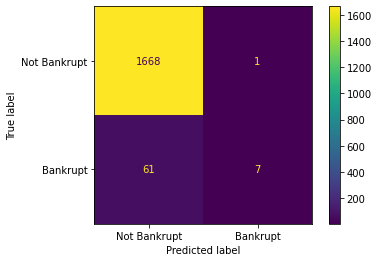

For train...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5005
           1       1.00      1.00      1.00       203

    accuracy                           1.00      5208
   macro avg       1.00      1.00      1.00      5208
weighted avg       1.00      1.00      1.00      5208



In [87]:
## GOOD VALUE: KNN impute with tol 0.01 and maxiter 32 => f1=46%

from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=16)
xgb = build_model(xgb,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=knn_imp,scaler=scaler)



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1024)
build_model(logistic,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=missf,scaler=scaler)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

ada = RandomForestClassifier(n_estimators=16, n_jobs=4, random_state=random_state, verbose=1)
build_model(ada,X_train_imp,Y_train,None,None,X_test,Y_test,impute_test=True,imputer=missf,scaler=scaler)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca = pca.fit(X_train_imp)

In [27]:
X_train_imp_pca = pca.transform(X_train_imp)

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=16)
xgb = build_model(xgb,X_train_imp_pca,Y_train,None,None,pca.transform(knn_imp.transform(X_test)),Y_test,impute_test=False)



## Combining...

In [28]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBClassifier


all_imputers = [ExtraTreesRegressor(n_estimators=16, n_jobs=4, random_state=random_state, verbose=0)]
# all_imputers = [KNeighborsRegressor(n_jobs=4),ExtraTreesRegressor(n_estimators=16, n_jobs=4, random_state=random_state, verbose=0),RandomForestRegressor(n_estimators=16, n_jobs=4, random_state=random_state, verbose=0),BayesianRidge(verbose=0)]

imputer=None
X_train_imp=None

for imputer_estimator in all_imputers:
    print(imputer_estimator)
    imputer,X_train_imp = build_imputer(imputer_estimator,X_train,Y_train,transform_x=True,reset_index = True,verbose=True,max_iter=32,tol=0.01,scaler=scaler)


ModuleNotFoundError: No module named 'sklearn.experimental'

### Various Classification Models

In [29]:
# !pip3 install imblearn

     |████████████████████████████████| 206 kB 2.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [57]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [50]:
def try_all_classifiers(X_train, X_test, y_train, y_test, classifiers, sampling  = None):
    accuracy = [0]*len(classifiers)
    f1 = [0]*len(classifiers)
    precision = [0]*len(classifiers)
    recall = [0]*len(classifiers)
    i = 0
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=1, shuffle = True)
    if sampling == "SMOTE":
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)
        print("SMOTE")
    if sampling == "RUS":
        rus = RandomUnderSampler()
        X_train, y_train = rus.fit_resample(X_train, y_train)
        print("RUS")
    if sampling == "SMOTEENN":
        rus = SMOTEENN(random_state=random_state,n_jobs=4)
        X_train, y_train = rus.fit_resample(X_train, y_train)
        print("SMOTEENN")
        
        
    
    for i in range(len(classifiers)):
        classif = classifiers[i]
        classif.fit(X_train, y_train)
        y_pred = classif.predict(X_test)
        
        accuracy[i] = classif.score(X_test, y_test)
        f1[i] = metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
        precision[i] = metrics.precision_score(y_test, y_pred)
        recall[i] = metrics.recall_score(y_test, y_pred)
    print("Done")
    return accuracy,f1,precision,recall

In [51]:
classifiers_names = ["Logistic Regression", "LDA", "KNN 5", "KNN 10", "GNB", "DT", "SVM", "RFC", "XGB"]
classifiers = [LogisticRegression(max_iter=2048), LinearDiscriminantAnalysis(),KNeighborsClassifier(n_neighbors=5), KNeighborsClassifier(n_neighbors=10),GaussianNB(),DecisionTreeClassifier(),SVC(kernel='linear',random_state=random_state),RandomForestClassifier(),XGBClassifier(use_label_encoder=False)]



In [52]:
#X_test_imp = imputer.transform(X_test)

In [53]:
accuracy,f1,precision,recall = try_all_classifiers(scaler.transform(X_train_imp),scaler.transform(X_test_imp),Y_train,Y_test, classifiers)


[14:28:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done


### Sampling

In [54]:
accuracy_sm,f1_sm,precision_sm,recall_sm = try_all_classifiers(scaler.transform(X_train_imp),scaler.transform(X_test_imp),Y_train,Y_test, classifiers, sampling = "SMOTE")



SMOTE
[14:28:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done


In [55]:
## scaler.transform(X_train_imp),scaler.transform(imputer.transform(X_test)),Y_train,Y_test,

In [58]:
accuracy_rus,f1_rus,precision_rus,recall_rus = try_all_classifiers(scaler.transform(X_train_imp),scaler.transform(X_test_imp),Y_train,Y_test, classifiers, sampling = "SMOTEENN")


SMOTEENN
[14:29:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Done


In [59]:
# actual missf

print('''
| classifier          | Accuracy | Precision | Recall | F1 score |
| =================== | ======== | ========= | ====== | ======== |''')
for c,a,p,r,f in zip(classifiers_names,accuracy,precision,recall,f1):
    print(c,"  |  ",a,"  |  ",p,"  |  ",r,"  |  ",f,"  |  ")
    
print("\n===============================================================\n")
for c,a,p,r,f in zip(classifiers_names,accuracy_sm,precision_sm,recall_sm,f1_sm):
    print(c,"  |  ",a,"  |  ",p,"  |  ",r,"  |  ",f,"  |  ")
  
print("\n===============================================================\n")
for c,a,p,r,f in zip(classifiers_names,accuracy_rus,precision_rus,recall_rus,f1_rus):
    print(c,"  |  ",a,"  |  ",p,"  |  ",r,"  |  ",f,"  |  ")
  



| classifier          | Accuracy | Precision | Recall | F1 score |
| =================== | ======== | ========= | ====== | ======== |
Logistic Regression   |   0.9227614490772386   |   0.3103448275862069   |   0.08823529411764706   |   0.13740458015267176   |  
LDA   |   0.9254955570745045   |   0.4146341463414634   |   0.16666666666666666   |   0.23776223776223773   |  
KNN 5   |   0.9330143540669856   |   0.5625   |   0.17647058823529413   |   0.26865671641791045   |  
KNN 10   |   0.9330143540669856   |   0.625   |   0.09803921568627451   |   0.1694915254237288   |  
GNB   |   0.9241285030758715   |   0.3448275862068966   |   0.09803921568627451   |   0.15267175572519084   |  
DT   |   0.9056732740943267   |   0.330188679245283   |   0.3431372549019608   |   0.33653846153846156   |  
SVM   |   0.9275461380724539   |   0.3333333333333333   |   0.0392156862745098   |   0.07017543859649122   |  
RFC   |   0.935064935064935   |   0.6129032258064516   |   0.18627450980392157   |   0.285

In [100]:
accuracy_table = np.vstack((classifiers_names, accuracy, accuracy_sm, accuracy_rus))
# display(accuracy_table)

In [101]:
f1_table = np.vstack((classifiers_names, f1, f1_sm, f1_rus))
# display(f1_table)

In [102]:
precision_table = np.vstack((classifiers_names,precision, precision_sm, precision_rus))
# display(precision_table)

In [103]:
recall_table = np.vstack((classifiers_names,recall, recall_sm, recall_rus))
# display(recall_table)

In [33]:
np.save("y5_incomp_realmiss_train.npy",X_train_imp)
np.save("y5_incomp_realmiss_test.npy",X_test_imp)



In [4]:
X_train_imp = np.load('y5_incomp_realmiss_train.npy')
#display(np.all(arr == X_train_imp))

X_test_imp = np.load('y5_incomp_realmiss_test.npy')
#display(np.all(arr == X_test_imp))